In [276]:
#Import numpy, pandas, matplot and regex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

## Moores law

https://en.wikipedia.org/wiki/Transistor_count

###  What does the list look like?

In [277]:
dflist = pd.read_html('https://en.wikipedia.org/wiki/Transistor_count', header=0, index_col=0)
dflist[0].head()

,Transistor count,Date of introduction,Designer,Process,Area
Processor,,,,,
Tegra Xavier SoC,"9,000,000,000[3]",2018,Nvidia,12 nm,350 mm²
TMS 1000,8000,1974[4],Texas Instruments,"8,000 nm",11 mm²
Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
MOS Technology 6502,"3,510[5]",1975,MOS Technology,"8,000 nm",21 mm²


In [278]:
moore=dflist[0]
type(moore)

pandas.core.frame.DataFrame

In [279]:
# The transistor cannot be indexed because of the word length
moore['Transistor count'].head()

Processor
Tegra Xavier SoC       9,000,000,000[3]
TMS 1000                           8000
Intel 4004                         2300
Intel 8008                         3500
MOS Technology 6502            3,510[5]
Name: Transistor count, dtype: object

In [280]:
# Split the string after '[' 
transistorList = moore['Transistor count'].str.split('[')

# The processors that do not have a transistor count need to be removed, because they cannot be used for the graph
# See the NaN values
transistorList[95:103]

Processor
8-core Core i7 Haswell-E                                       [2,600,000,000, 31]]
10-core Xeon Westmere-EX                                               [2600000000]
Six-core zEC12                                                         [2750000000]
Apple A8X (tri-core ARM64 "mobile SoC")                        [3,000,000,000, 32]]
Qualcomm Snapdragon 835 (octa-core ARM64 "mobile SoC")    [3,000,000,000, 33], 34]]
Qualcomm Snapdragon 845 (octa-core ARM64 "mobile SoC")    [5,300,000,000, 35], 36]]
Qualcomm Snapdragon 710 (octa-core ARM64 "mobile SoC")                          NaN
Qualcomm Snapdragon 850 (octa-core ARM64 "mobile SoC")    [5,300,000,000, 37], 38]]
Name: Transistor count, dtype: object

In [281]:
# Create an isnull method to preserve the Area column as it is, and only remove the ones without transistor counts
# An array of booleans
taggedForRemoval = transistorList.isnull()

#Every item in the array "taggedForRemoval" will be removed from the original Moore list
moore = moore.drop(moore[taggedForRemoval].index)

In [282]:
#Check the count again, now it fits with the rest
moore.count()

Transistor count        135
Date of introduction    135
Designer                135
Process                 135
Area                    128
dtype: int64

# Regex to clean up the data

In [283]:
#Remove the brackets and commas from the years and numbers
yearsList = [re.sub('\[.*\]','',s) for s in moore['Date of introduction']][:len(moore['Date of introduction'])] 
#Check if the they are gone
yearsList[0:10]

['2018',
 '1974',
 '1971',
 '1972',
 '1975',
 '1974',
 '1974',
 '1974',
 '1976',
 '1976']

In [284]:
listOfNumbers = [re.sub('\[.*\]','',s) for s in moore['Transistor count']][:len(moore['Transistor count'])]
#Also remove the commas from list
numbersList = [re.sub(',(?!\s+\d$)', '',s) for s in listOfNumbers][:len(listOfNumbers)]
numbersList[0:10]

['9000000000',
 '8000',
 '2300',
 '3500',
 '3510',
 '4100',
 '4500',
 '5000',
 '6500',
 '8500']

## Append the fixed data to the dataframe

In [285]:
moore['Date of introduction'] = yearsList
moore['Transistor count'] = numbersList
moore[0:10]

,Transistor count,Date of introduction,Designer,Process,Area
Processor,,,,,
Tegra Xavier SoC,9000000000,2018,Nvidia,12 nm,350 mm²
TMS 1000,8000,1974,Texas Instruments,"8,000 nm",11 mm²
Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
MOS Technology 6502,3510,1975,MOS Technology,"8,000 nm",21 mm²
Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²
Intel 8085,6500,1976,Intel,"3,000 nm",20 mm²


## Sort the dataframe

In [286]:
mooreByYear = moore.sort_values('Date of introduction')
mooreByYear[0:10]

,Transistor count,Date of introduction,Designer,Process,Area
Processor,,,,,
Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
TMS 1000,8000,1974,Texas Instruments,"8,000 nm",11 mm²
Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²
MOS Technology 6502,3510,1975,MOS Technology,"8,000 nm",21 mm²
Intel 8085,6500,1976,Intel,"3,000 nm",20 mm²
Zilog Z80,8500,1976,Zilog,"4,000 nm",18 mm²


# 1.0 Making the stapelgraph


In [287]:
# Every 10th column
mooreByYear = mooreByYear.iloc[::10, :]
mooreByYear[0:1]

,Transistor count,Date of introduction,Designer,Process,Area
Processor,,,,,
Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²


In [288]:
plotYears = mooreByYear['Date of introduction']
plotNumbers = mooreByYear['Transistor count']
plotNumbers.tail()

Processor
Apple A7 (dual-core ARM64 "mobile SoC")                    1000000000
32-core SPARC M7                                          10000000000
Qualcomm Snapdragon 835 (octa-core ARM64 "mobile SoC")     3000000000
Ryzen 5 1600 X Ryzen                                       4800000000
HiSilicon Kirin 980 (octa-core ARM64 "mobile SoC")         6900000000
Name: Transistor count, dtype: object

In [289]:
x = np.arange(len(plotYears))

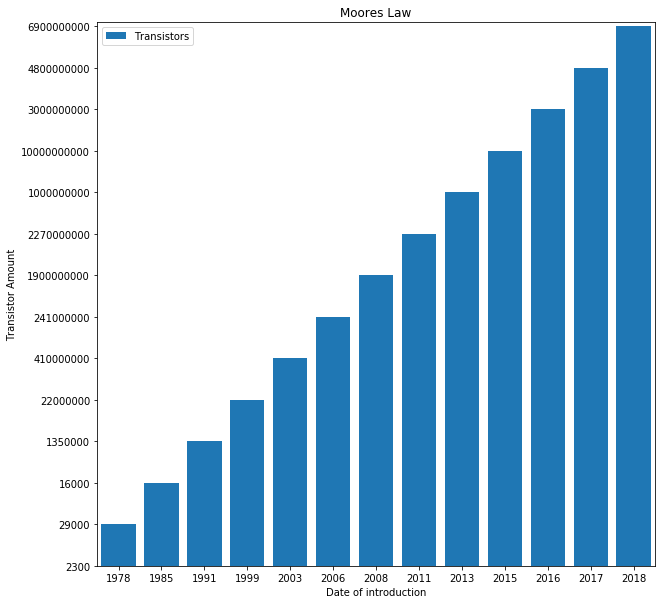

In [290]:
#Size of the figure
plt.figure(figsize=(10,10))
#Display the amount of transistors on the Y axis, also label the bars in correlation
plt.bar(x, plotNumbers, label="Transistors")
#Display the years on the Y axis
plt.xticks(x, plotYears)
#Where the legend (label for x and y) are gonna get displayed
plt.legend(loc="upper left")
#The labels for x and y axes
plt.ylabel('Transistor Amount')
plt.xlabel('Date of introduction')
#Size the graph accordingly
plt.xlim(0.5, 13.5)
plt.ylim(0, 13.1)
#Give it a title!
plt.title('Moores Law')
#Display the graph
plt.show()

# 1.1 Making the linegraph

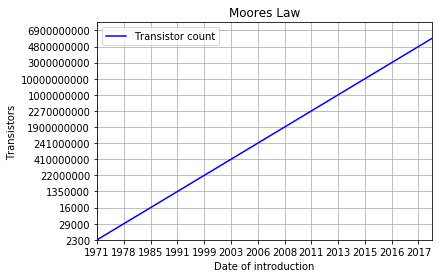

In [291]:
plt.plot(x, plotNumbers, "-b", label="Transistor count")
plt.xticks(x, plotYears)
plt.ylabel('Transistors')
plt.xlabel('Date of introduction')
plt.legend(loc="upper left")
plt.xlim(0, 12.5)
plt.ylim(0, 13.5)
plt.grid()
plt.title('Moores Law')
plt.show()

# 2.0 Making the scatterplot

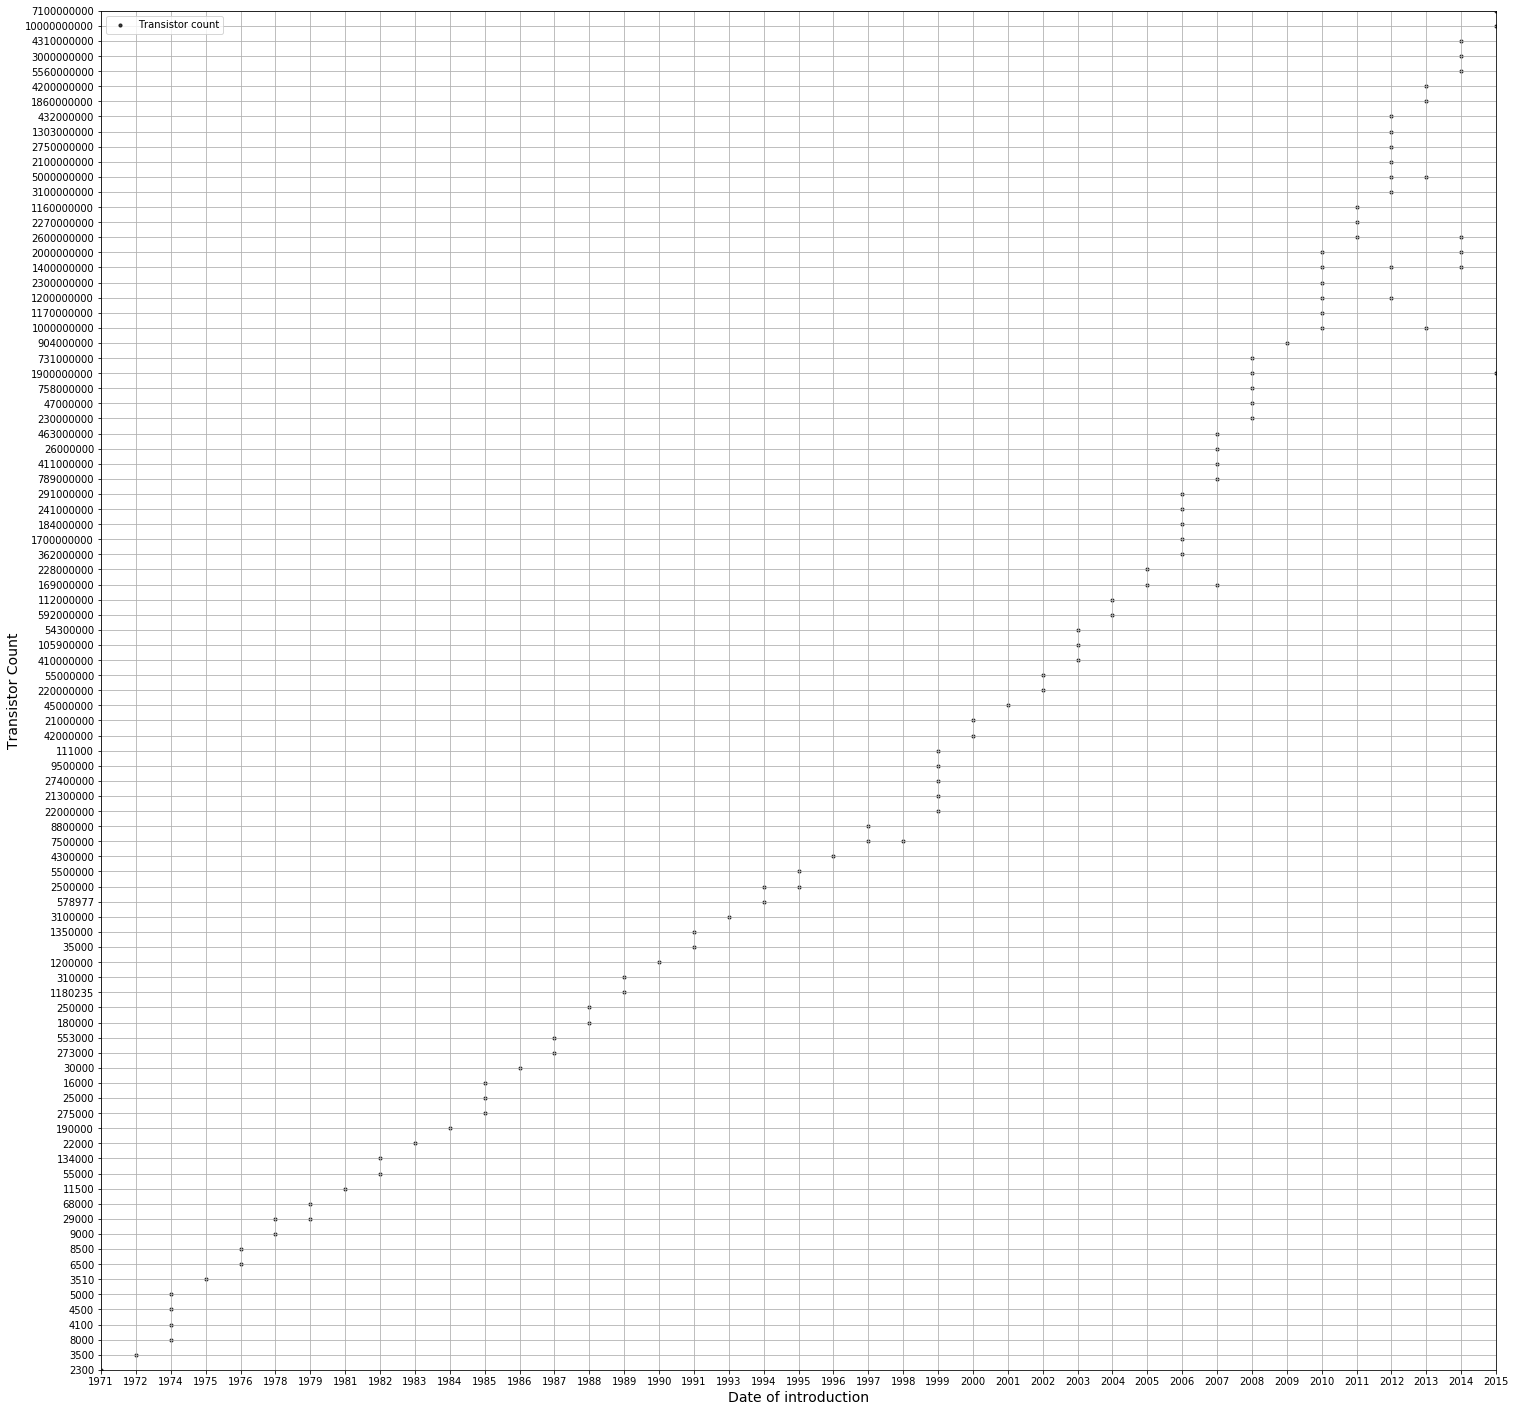

In [292]:
#This scatterplot defines the realistic productioncycle of processors
moore = moore.sort_values('Date of introduction')
moore = moore.reset_index()
#Create a scatterplot the realistic amount of transistors for each year
plt.scatter(moore['Date of introduction'],moore['Transistor count'],color='black',s=10,alpha=0.75, label="Transistor count")
plt.xlim(0,40)
plt.ylim(0,90)
plt.xlabel('Date of introduction',fontsize=14)
plt.ylabel('Transistor Count',fontsize=14)
plt.gcf().set_size_inches(25,25)
plt.legend(loc="upper left")
plt.grid()

# 3.0 Insights

Detta var en mycket lärorik uppgift, mest hade jag problem med att få datan rensad. 

Jag lyckades tyvärr inte få klar gemförelsen med moore's law i en scatterplot.